In [1]:
import qiskit
import matplotlib

In [2]:
# Import required modules from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Create a quantum circuit with 2 qubits and 2 classical bits
circuit = QuantumCircuit(2, 2)

# Add a Hadamard gate to the first qubit
circuit.h(0)

# Add a controlled-X (CNOT) gate from qubit 0 to qubit 1
circuit.cx(0, 1)

# Measure both qubits to classical bits
circuit.measure([0, 1], [0, 1])

# Use the Aer simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator (optional, but good practice)
transpiled_circuit = transpile(circuit, simulator)

# Run the simulation
job = simulator.run(transpiled_circuit, shots=1024)

# Get the result
result = job.result()
counts = result.get_counts()

print("Measurement results:", counts)



Measurement results: {'11': 512, '00': 512}


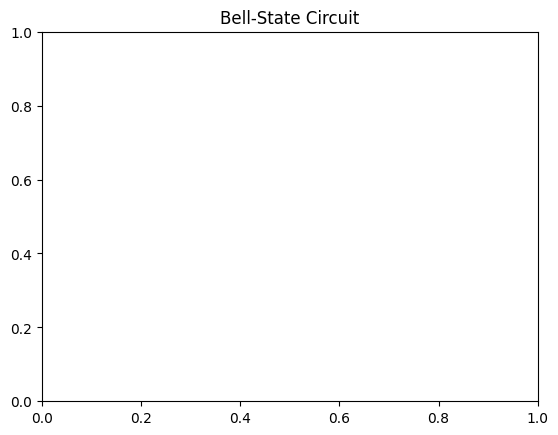

QiskitError: 'No statevector for experiment "None"'

In [6]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# 1) Build a 2-qubit Bell circuit with measurements
qc = QuantumCircuit(2, 2)
qc.h(0)            # superpose qubit-0
qc.cx(0, 1)       # entangle qubit-1 with qubit-0
qc.measure([0, 1], [0, 1])  # measure both qubits

# 2) Draw the circuit
fig1 = qc.draw(output='mpl', scale=1.5)
plt.title("Bell-State Circuit")
plt.show(fig1)

# 3) Simulate the statevector *before* measurement to visualize entanglement
#    (we rebuild the circuit without the measure instructions)
qc_sv = QuantumCircuit(2)
qc_sv.h(0)
qc_sv.cx(0, 1)

sim = AerSimulator(method='statevector')
t_qc_sv = transpile(qc_sv, sim)
job_sv   = sim.run(t_qc_sv)
result_sv = job_sv.result()
statevec = result_sv.get_statevector()

# 4) Plot the Bloch multivector
fig2 = plot_bloch_multivector(statevec)
plt.suptitle("Bloch Multivector of Bell State", y=0.9)
plt.show(fig2)

# 5) Run the full circuit with measurements on the QASM simulator
sim_qasm = AerSimulator()  # defaults to qasm_simulator
t_qc_meas = transpile(qc, sim_qasm)
job_meas  = sim_qasm.run(t_qc_meas, shots=1024)
counts    = job_meas.result().get_counts()

# 6) Plot the measurement histogram
fig3 = plot_histogram(counts)
plt.title("Measurement Results (1024 shots)")
plt.show(fig3)

print("Raw counts:", counts)


In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# Build a Bell-state circuit (no measurements here!)
qc_sv = QuantumCircuit(2)
qc_sv.h(0)
qc_sv.cx(0, 1)

# Directly compute the statevector
state = Statevector.from_instruction(qc_sv)

# Plot the Bloch multivector
fig = plot_bloch_multivector(state.data)
plt.show(fig)


In [23]:
print(qc.draw())   # simple ASCII art in the console


     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [28]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


In [29]:
import matplotlib.pyplot as plt
import pylatexenc
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# Build a Bell-state circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0,1], [0,1])

# 1) Circuit diagram
fig1 = qc.draw(output='mpl', scale=1.5)

plt.title("Bell-State Circuit")
plt.show(fig1)

# 2) Statevector (pre-measure) for Bloch plot
qc_sv = QuantumCircuit(2)
qc_sv.h(0); qc_sv.cx(0,1)
sim_sv = AerSimulator(method='statevector')
t_qc_sv = transpile(qc_sv, sim_sv)
res_sv = sim_sv.run(t_qc_sv).result()
state = res_sv.get_statevector()
fig2 = plot_bloch_multivector(state)
plt.suptitle("Bloch Multivector of Bell State", y=0.9)
plt.show(fig2)

# 3) QASM simulation & histogram
sim_q = AerSimulator()
t_qc_q = transpile(qc, sim_q)
res_q = sim_q.run(t_qc_q, shots=1024).result()
counts = res_q.get_counts()
fig3 = plot_histogram(counts)
plt.title("Measurement Results (1024 shots)")
plt.show(fig3)

print("Raw counts:", counts)


MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

In [7]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# 1) Build the “statevector” version of the circuit
qc_sv = QuantumCircuit(2, 2)
qc_sv.h(0)
qc_sv.cx(0, 1)
# This tells the simulator: “please keep the statevector here”
qc_sv.save_statevector(label='sv')

# 2) Set up the simulator and run
sim = AerSimulator(method='statevector')
t_qc_sv = transpile(qc_sv, sim)
job_sv   = sim.run(t_qc_sv)
result_sv = job_sv.result()

# 3) Extract and plot the statevector
statevec = result_sv.data(0)['sv']   # 'sv' matches the label above
fig2     = plot_bloch_multivector(statevec)
plt.show(fig2)

# 4) Now build & run the “measurement” version
qc_meas = QuantumCircuit(2, 2)
qc_meas.h(0); qc_meas.cx(0,1)
qc_meas.measure([0,1], [0,1])

t_qc_m  = transpile(qc_meas, sim)
job_m   = sim.run(t_qc_m, shots=1024)
counts  = job_m.result().get_counts()

fig3 = plot_histogram(counts)
plt.show(fig3)


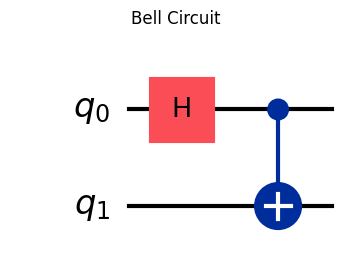

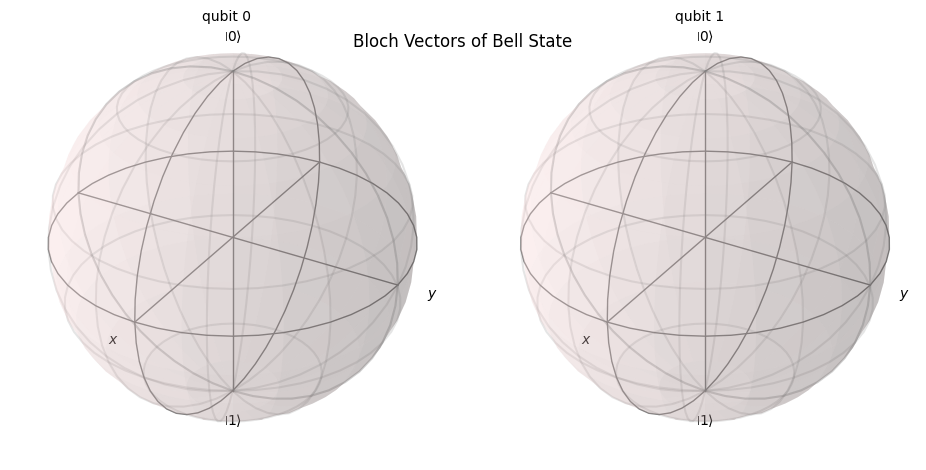

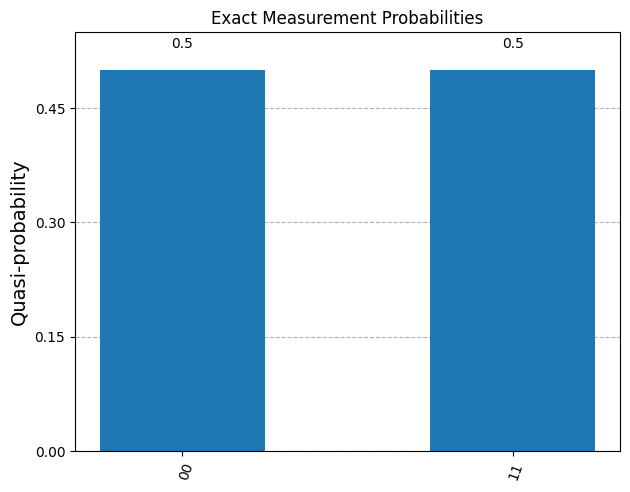

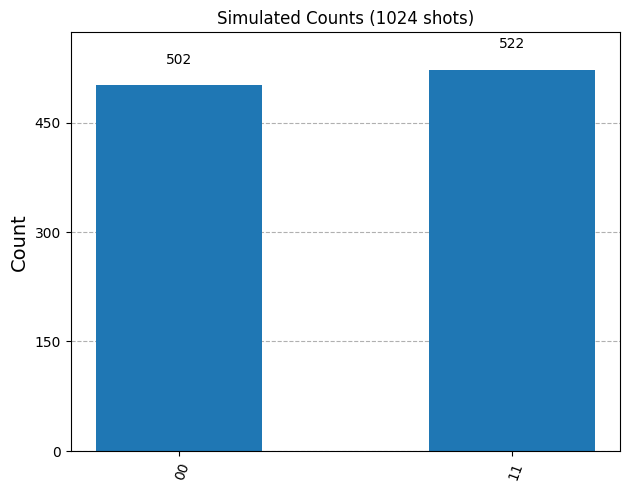

In [8]:
# At the very top of your notebook:
%matplotlib inline

import matplotlib.pyplot as plt
import random

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram

# 1) Build a 2-qubit Bell circuit (no measurements)
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# 2) Draw the circuit diagram and show it
fig1 = qc.draw(output='mpl', scale=1.5)
plt.title("Bell Circuit")
plt.show(fig1)

# 3) Get the statevector and plot Bloch multivector
sv = Statevector.from_instruction(qc)
fig2 = plot_bloch_multivector(sv.data)
plt.suptitle("Bloch Vectors of Bell State", y=0.92)
plt.show(fig2)

# 4) Compute exact probabilities and plot histogram
probs = sv.probabilities_dict()
fig3 = plot_histogram(probs, bar_labels=[f"{p:.2f}" for p in probs.values()])
plt.title("Exact Measurement Probabilities")
plt.show(fig3)

# 5) (Optional) Sample like 1024 shots for a “counts” histogram
shots = 1024
counts = {basis: 0 for basis in probs}
for _ in range(shots):
    r = random.random()
    cum = 0
    for basis, p in probs.items():
        cum += p
        if r <= cum:
            counts[basis] += 1
            break
fig4 = plot_histogram(counts)
plt.title("Simulated Counts (1024 shots)")
plt.show(fig4)


In [10]:
# If using Jupyter, enable inline plotting
%matplotlib inline

import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit.visualization import plot_histogram

# 1) Noise model: single-qubit bit-flip with p=0.1
p_error = 0.1
bit_flip_error = pauli_error([('X', p_error), ('I', 1 - p_error)])
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(bit_flip_error, ['id', 'cx'])

# 2) Plain circuit: prepare |1> and measure
qc_plain = QuantumCircuit(1, 1)
qc_plain.x(0)
qc_plain.measure(0, 0)

# 3) Encoded circuit: 3-qubit repetition code for |1>, then measure each qubit
qc_enc = QuantumCircuit(3, 3)
qc_enc.x(0)
qc_enc.cx(0, 1)
qc_enc.cx(0, 2)
qc_enc.measure([0, 1, 2], [0, 1, 2])

# 4) Simulate both circuits with AerSimulator + noise model
sim = AerSimulator(noise_model=noise_model)

# Plain
t_plain = transpile(qc_plain, sim)
counts_plain = sim.run(t_plain, shots=2000).result().get_counts()

# Encoded
t_enc = transpile(qc_enc, sim)
counts_enc = sim.run(t_enc, shots=2000).result().get_counts()

# 5) Majority-vote decoding for encoded results
logical_counts_enc = {'0': 0, '1': 0}
for outcome, cnt in counts_enc.items():
    bits = list(map(int, outcome[::-1]))  # [bit0, bit1, bit2]
    logical_counts_enc['1' if sum(bits) >= 2 else '0'] += cnt

# 6) Plot comparison
fig = plot_histogram(
    [counts_plain, logical_counts_enc],
    legend=['Unencoded', 'Encoded (majority vote)']
)
plt.title("Three-Qubit Bit-Flip Code under Noise (p=0.1)")
plt.show(fig)


NoiseError: '1 qubit QuantumError cannot be applied to 2 qubit instruction "cx".'

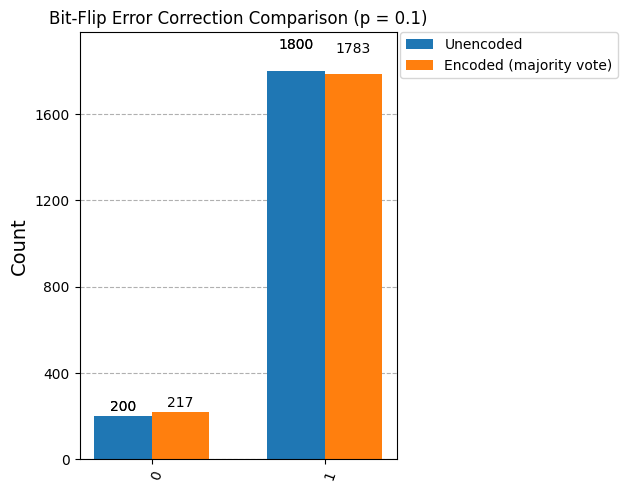

In [11]:
# Error Correction Example with Simplified Noise Model

import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit.visualization import plot_histogram

# Enable inline plotting if in Jupyter
try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except:
    pass

# 1) Define a simple bit-flip noise model (apply only to single-qubit gates and identity)
p_error = 0.1  # bit-flip error probability
bit_flip_error = pauli_error([('X', p_error), ('I', 1 - p_error)])
noise_model = NoiseModel()
# Apply bit-flip error to all single-qubit instructions (id represents idle noise)
noise_model.add_all_qubit_quantum_error(bit_flip_error, ['id', 'u3', 'u2', 'u1', 'x', 'h'])

# 2) Plain circuit: prepare |1> and measure
qc_plain = QuantumCircuit(1, 1)
qc_plain.x(0)              # prepare logical '1'
qc_plain.measure(0, 0)

# 3) Encoded circuit: 3-qubit repetition code for |1>, then measure all
qc_enc = QuantumCircuit(3, 3)
qc_enc.x(0)                # prepare logical '1'
qc_enc.cx(0, 1)
qc_enc.cx(0, 2)            # now qubits [0,1,2] = |111>
qc_enc.measure([0, 1, 2], [0, 1, 2])

# 4) Simulate both circuits under the noise model
sim = AerSimulator(noise_model=noise_model)

# Plain circuit simulation
t_plain = transpile(qc_plain, sim)
counts_plain = sim.run(t_plain, shots=2000).result().get_counts()

# Encoded circuit simulation
t_enc = transpile(qc_enc, sim)
counts_enc = sim.run(t_enc, shots=2000).result().get_counts()

# 5) Post-process encoded results with majority vote
logical_counts_enc = {'0': 0, '1': 0}
for outcome, cnt in counts_enc.items():
    bits = list(map(int, outcome[::-1]))  # [bit0, bit1, bit2]
    # if majority of physical bits are 1, decode to logical '1'
    logical_counts_enc['1' if sum(bits) >= 2 else '0'] += cnt

# 6) Plot comparison histogram
fig = plot_histogram([counts_plain, logical_counts_enc],
                     legend=['Unencoded', 'Encoded (majority vote)'])
plt.title("Bit-Flip Error Correction Comparison (p = 0.1)")
plt.show(fig)
